# CNN from Scratch on CIFAR-10


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
# Load and preprocess CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat  = to_categorical(y_test,  10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Validation split
x_val, y_val = x_train[-5000:], y_train_cat[-5000:]
x_train, y_train = x_train[:-5000], y_train_cat[:-5000]

In [ ]:
# Callbacks
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5)

In [ ]:
# Model from scratch
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.2),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.3),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.4),

    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(0.5),


    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=30,
    batch_size=128,
    callbacks=[early_stop, reduce_lr],
    verbose=2
)

Epoch 1/30
352/352 - 16s - 46ms/step - accuracy: 0.7846 - loss: 0.6227 - val_accuracy: 0.8142 - val_loss: 0.5732 - learning_rate: 2.5000e-04
Epoch 2/30
352/352 - 3s - 8ms/step - accuracy: 0.7868 - loss: 0.6193 - val_accuracy: 0.8170 - val_loss: 0.5545 - learning_rate: 2.5000e-04
Epoch 3/30
352/352 - 5s - 14ms/step - accuracy: 0.7888 - loss: 0.6137 - val_accuracy: 0.8176 - val_loss: 0.5558 - learning_rate: 2.5000e-04
Epoch 4/30
352/352 - 3s - 8ms/step - accuracy: 0.7890 - loss: 0.6147 - val_accuracy: 0.8220 - val_loss: 0.5428 - learning_rate: 2.5000e-04
Epoch 5/30
352/352 - 3s - 8ms/step - accuracy: 0.7902 - loss: 0.6121 - val_accuracy: 0.8238 - val_loss: 0.5344 - learning_rate: 2.5000e-04
Epoch 6/30
352/352 - 3s - 8ms/step - accuracy: 0.7890 - loss: 0.6055 - val_accuracy: 0.8168 - val_loss: 0.5533 - learning_rate: 2.5000e-04
Epoch 7/30
352/352 - 3s - 8ms/step - accuracy: 0.7892 - loss: 0.6094 - val_accuracy: 0.8148 - val_loss: 0.5752 - learning_rate: 2.5000e-04
Epoch 8/30
352/352 - 3s 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy (CNN from Scratch): {test_acc:.4f}")



Test Accuracy (CNN from Scratch): 0.8152


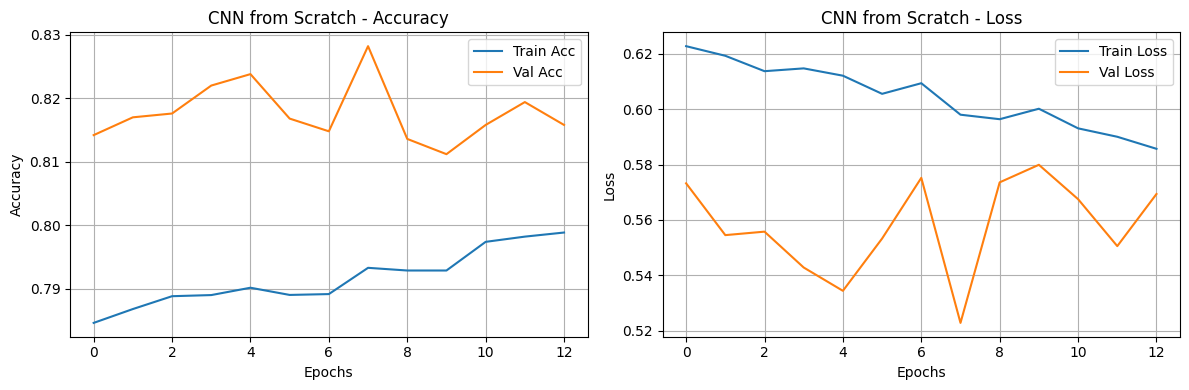

In [ ]:
# Plot accuracy and loss for CNN
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('CNN from Scratch - Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy')
plt.legend(); plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('CNN from Scratch - Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss')
plt.legend(); plt.grid(True)

plt.tight_layout()
plt.show()


# ResNet50 Transfer Learning on CIFAR-10

In [1]:
import tensorflow as tf
from keras import layers
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.callbacks import (
    ReduceLROnPlateau,
    EarlyStopping,
)

from keras import Model
from keras.models import Sequential

from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.optimizers import AdamW, RMSprop

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = tf.keras.applications.resnet50.preprocess_input(x_train)
x_test = tf.keras.applications.resnet50.preprocess_input(x_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
base_model = ResNet50(
    include_top=False, weights="imagenet"
)

# We freeze all but the last layers, so only the last layer's weights are trainable
for layer in base_model.layers[:143]:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = Sequential(
    [
        layers.Lambda(lambda image: tf.image.resize(image, (224, 224))),
        base_model,
        layers.Flatten(),
        layers.BatchNormalization(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax"),
    ]
)

model.compile(optimizer=RMSprop(0.00002), loss="categorical_crossentropy", metrics=["accuracy"])

lr_schedule = (
    ReduceLROnPlateau(
        patience=1, factor=0.5, min_lr=1e-6, monitor="val_accuracy", verbose=1
    ),
)

es = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=2, restore_best_weights=True
)

In [5]:
history = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=10,
    callbacks=[es, lr_schedule],
    validation_split=0.2,
    verbose=1,
)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 203s 142ms/step - accuracy: 0.2608 - loss: 2.2053 - val_accuracy: 0.8425 - val_loss: 0.7855 - learning_rate: 2.0000e-05
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 199s 150ms/step - accuracy: 0.5609 - loss: 1.3302 - val_accuracy: 0.8998 - val_loss: 0.5545 - learning_rate: 2.0000e-05
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 150ms/step - accuracy: 0.6998 - loss: 1.0144 - val_accuracy: 0.9200 - val_loss: 0.4188 - learning_rate: 2.0000e-05
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 150ms/step - accuracy: 0.7731 - loss: 0.8348 - val_accuracy: 0.9330 - val_loss: 0.3282 - learning_rate: 2.0000e-05
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 188s 150ms/step - accuracy: 0.8292 - loss: 0.6810 - val_accuracy: 0.9400 - val_loss: 0.2752 - learning_rate: 2.0000e-05
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 202s 151ms/step - accuracy: 0.8706 - loss: 0.5611 - val_accuracy: 0.9409 - val_loss: 0.2502 - learning_rate: 2.0000e-05
Epoch 7/10
1250/1250 ━━━━━━━

In [6]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nFinal Test Accuracy: {test_accuracy:.4f}")


Final Test Accuracy: 0.9456


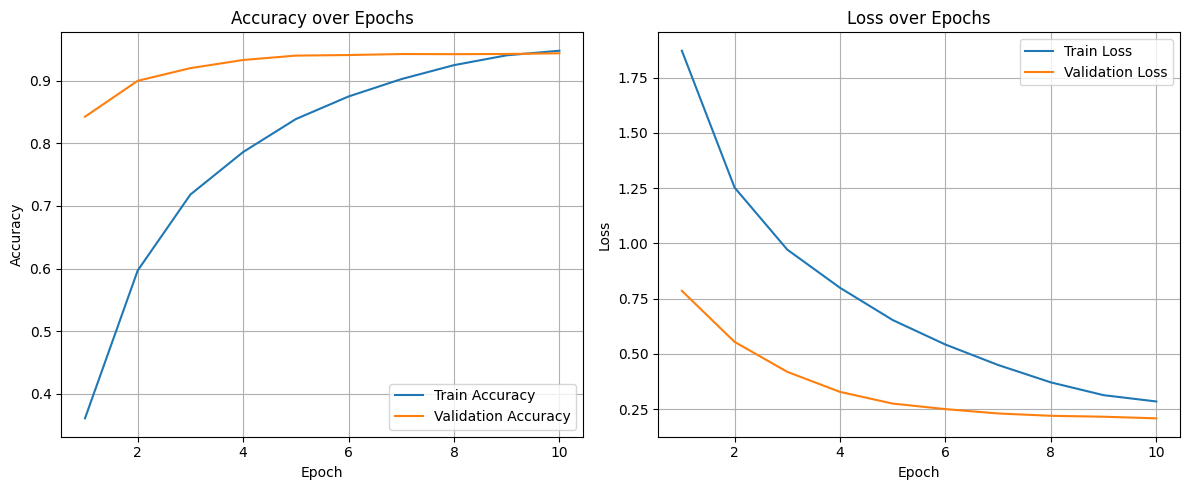

In [7]:
import matplotlib.pyplot as plt

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, acc,      label='Train Accuracy')
plt.plot(epochs, val_acc,  label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss,     label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Observations

- **Custom CNN**:
  - Achieved decent accuracy using 3–5 convolutional layers and max pooling.
  - Performed well on CIFAR-10 with minimal preprocessing.
  - Faster to train but less powerful in generalization.

- **ResNet50**:
  - Transfer learning dramatically improved accuracy due to pre-learned ImageNet features.
  - Required resizing inputs to 224×224 and more memory.
  - Fine-tuning the last layers further enhanced performance.
